<a href="https://colab.research.google.com/github/palienko105/Projects/blob/main/AB_Test_Duration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

Смоделируем ситуацию:     
Есть интернет-магазин по продаже книг. В среднем за день в магазине совершают покупки 200 человек (200 чеков). В магазине были внесены изменения в визуальное оформление магазина. Нужно провести A/B тест и посмотреть как изменяются параметры p-value и как меняется среднее значение чека в процессе эксперимента.

Средний чек старой версии сайта составляет 600 рублей.     
Версию А видят 50% процентов человек, версию B видят 50% человек.
Эксперимент длится 100 дней, alfa = 0.05.    

1)H0: средний чек A_версии == средний чек B_версии     
2)H1: средний чек A_версии != средний чек B_версии

**Это все лишь симуляция, где я заранее задаю значения. Данный блокнот предназначен для того, чтобы наглядно посмотреть как ведут себя некоторые статистические показатели на практике.**

# A/A тест

Посмотрю как будет себя вести p-value и среднее значение по ходу эксперимента, если на самом деле различий нет и всем пользователям показывать абсолютно одинкаовые версии магазина.


In [73]:
days = 100

control_mean = 600
control_sigma = 100
control_cnt_users = 100

test_mean = 600
test_sigma = 100
test_cnt_users = 100

In [74]:
days_data = pd.DataFrame() # DF, с данными по всем дням для всех групп (A и B)
days_pval = pd.DataFrame() # DF, с значениями p-value по всем дням.
days_mean = pd.DataFrame() # DF, с накопительным средним (т.е. в 1 день считается среднее за один день, во 2 день считается среднее за два дня и т.д.)

In [75]:
for day in range(1,days+1):
  day_control = np.random.normal(control_mean,control_sigma,control_cnt_users)
  day_test = np.random.normal(test_mean,test_sigma,test_cnt_users)

  cur_day_data_control = pd.DataFrame() #Создаем каждый день DF и кладем туда данные контрольной группы

  cur_day_data_control['values'] = day_control
  cur_day_data_control['group'] = 'control'
  cur_day_data_control['day'] = day

  cur_day_data_test = pd.DataFrame() #Создаем каждый день DF и кладем туда данные тестовой группы

  cur_day_data_test['values'] = day_test
  cur_day_data_test['group'] = 'test'
  cur_day_data_test['day'] = day

  days_data = days_data.append(cur_day_data_control).append(cur_day_data_test)

  ttest_pval = (ttest_ind(days_data[days_data['group'] == 'control']['values'].values
                          , days_data[days_data['group'] == 'test']['values'].values)[1])
  
  cur_day_pval = pd.DataFrame({'p_value':[ttest_pval], 'day': [day]}) 
  days_pval = days_pval.append(cur_day_pval)

  cur_day_mean = days_data.groupby(['group'], as_index=False).agg({'values':'mean'})
  cur_day_mean['day'] = day
  days_mean = days_mean.append(cur_day_mean)

days_mean = days_mean.reset_index(drop=True)
days_data = days_data.reset_index(drop=True)
days_pval = days_pval.reset_index(drop=True)



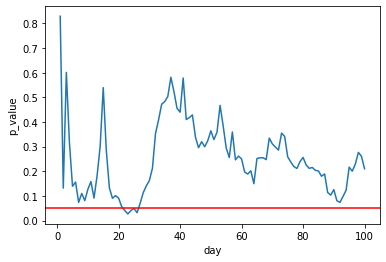

In [76]:
fig = sns.lineplot(data=days_pval, x='day', y='p_value')
fig.axhline(y=0.05, color='red')

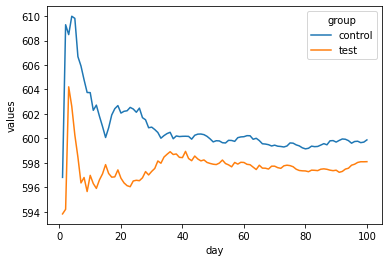

In [77]:
sns.lineplot(data=days_mean,x='day', y='values', hue='group')

За всё время длительности эксперимента p-value довольно сильно изменялся и в некоторые дни график p-value пересекал значение принятого уровня значимости (0.05), хотя на самом деле никаких статистически значимых различий не должно быть. Но т.к. я заранее сказал, что эксперимент будет длиться 100 дней, то интересует только самое последнее значение p-value. Оно больше 0.05, соответственно мы не можем отклонить H0.


График средних значений с течением времени всё меньше и меньше начинает колебаться и с течением времени  достигает того  среднего значения, которое было описано выше (600руб.).

# A/B тест

Средний чек в магазине с новым дизайном вырос на 10 рублей. Хотим посмотреть на то, как ведет себя p-value 

In [83]:
days = 100

control_mean = 600
control_sigma = 100
control_cnt_users = 100

test_mean = 610
test_sigma = 100
test_cnt_users = 100

In [84]:
days_data = pd.DataFrame() # DF, с данными по всем дням для всех групп (A и B)
days_pval = pd.DataFrame() # DF, с значениями p-value по всем дням.
days_mean = pd.DataFrame() # DF, с накопительным средним (т.е. в 1 день считается среднее за один день, во 2 день считается среднее за два дня и т.д.)

In [85]:
for day in range(1,days+1):
  day_control = np.random.normal(control_mean,control_sigma,control_cnt_users)
  day_test = np.random.normal(test_mean,test_sigma,test_cnt_users)

  cur_day_data_control = pd.DataFrame() #Создаем каждый день DF и кладем туда данные контрольной группы

  cur_day_data_control['values'] = day_control
  cur_day_data_control['group'] = 'control'
  cur_day_data_control['day'] = day

  cur_day_data_test = pd.DataFrame() #Создаем каждый день DF и кладем туда данные тестовой группы

  cur_day_data_test['values'] = day_test
  cur_day_data_test['group'] = 'test'
  cur_day_data_test['day'] = day

  days_data = days_data.append(cur_day_data_control).append(cur_day_data_test)

  ttest_pval = (ttest_ind(days_data[days_data['group'] == 'control']['values'].values
                          , days_data[days_data['group'] == 'test']['values'].values)[1])
  
  cur_day_pval = pd.DataFrame({'p_value':[ttest_pval], 'day': [day]}) 
  days_pval = days_pval.append(cur_day_pval)

  cur_day_mean = days_data.groupby(['group'], as_index=False).agg({'values':'mean'})
  cur_day_mean['day'] = day
  days_mean = days_mean.append(cur_day_mean)

days_mean = days_mean.reset_index(drop=True)
days_data = days_data.reset_index(drop=True)
days_pval = days_pval.reset_index(drop=True)



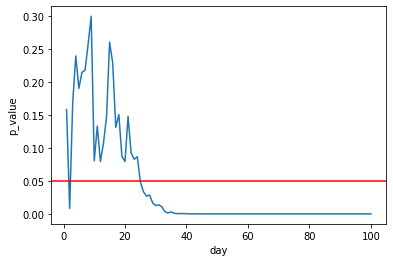

In [86]:
fig = sns.lineplot(data=days_pval, x='day', y='p_value')
fig.axhline(y=0.05, color='red')

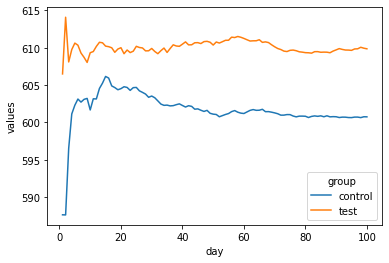

In [87]:
sns.lineplot(data=days_mean,x='day', y='values', hue='group')

На данных графиках видно, что график p-value пробивает уровень значимости (0.05)только спустя некоторое время и дальше выше этого значения не поднимается.
Исходя из этого графика можно сделать вывод, что после завершения A/B теста у нас достаточно оснований отклонить нулевую гипотезу.

График средних значений имеет аналогичную тенденцию как и на графике из пункта выше.